# Dataset for mosquito collections on Big Pine Key, Florida, USA

In [1]:
import pandas as pd
import numpy as np
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
florida = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/florida_1998_to_2019.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/Juanfra21/mosquito-population-model/main/data/weather_data.csv')

In [3]:
temperature = temperature[['datetime', 'humidity', 'temp', 'precip']]

# Temperature

In [4]:

# Now create the DATE column without spaces in the names
temperature['datetime'] = pd.to_datetime(temperature['datetime'], errors='coerce')
temperature.rename(columns={'datetime': 'Date'}, inplace=True)
temperature

,Date,humidity,temp,precip
0,1998-01-01,64.1,16.5,0.000
1,1998-01-02,72.3,19.8,0.000
2,1998-01-03,82.9,21.6,0.000
3,1998-01-04,89.2,22.7,0.300
4,1998-01-05,90.5,23.4,0.000
...,...,...,...,...
8030,2019-12-27,78.5,25.2,0.451
8031,2019-12-28,81.5,25.6,0.000
8032,2019-12-29,82.3,25.8,1.442
8033,2019-12-30,85.3,25.3,3.144


# Mosquito abundance

In [5]:
florida

,YEAR,DOY,TAEN,DEIN,NIGR,ATRO,QUIN,CRUC,BAHA,INFI,...,ALBI,COND,MULR,PILO,DECL,INOR,GRAB,TITI,UNID,TOTAL
0,1998,232,"1,272.00",76,4,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,354.00"
1,1998,237,"4,792.00",48,24,0,NaN,0,0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,008.00"
2,1998,244,"4,000.00",0,0,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000.00"
3,1998,251,488,0,0,1,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
4,1998,253,"1,324.00",4,0,8,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,336.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2019,56,404,12,0,1,0.0,0,1,0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435
994,2019,64,21,1,0,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
995,2019,70,32,2,0,2,0.0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
996,2019,77,206,4,0,16,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227


In [6]:
florida['TOTAL'] = florida['TOTAL'].str.replace(',', '').astype(float)

# 显示结果验证转换是否正确
print(florida[['YEAR', 'DOY', 'TOTAL']])

     YEAR  DOY   TOTAL
0    1998  232  1354.0
1    1998  237  5008.0
2    1998  244  4000.0
3    1998  251   490.0
4    1998  253  1336.0
..    ...  ...     ...
993  2019   56   435.0
994  2019   64    23.0
995  2019   70    39.0
996  2019   77   227.0
997  2019   85     2.0

[998 rows x 3 columns]


In [7]:
# 定义一个函数将年和天转换为日期
def convert_to_date(row):
    return datetime.datetime(row['YEAR'], 1, 1) + datetime.timedelta(days=row['DOY'] - 1)

# 应用函数转换YEAR和DOY为日期
florida['Date'] = florida.apply(convert_to_date, axis=1)

# 查看转换后的结果
print(florida[['YEAR', 'DOY', 'Date']])

     YEAR  DOY       Date
0    1998  232 1998-08-20
1    1998  237 1998-08-25
2    1998  244 1998-09-01
3    1998  251 1998-09-08
4    1998  253 1998-09-10
..    ...  ...        ...
993  2019   56 2019-02-25
994  2019   64 2019-03-05
995  2019   70 2019-03-11
996  2019   77 2019-03-18
997  2019   85 2019-03-26

[998 rows x 3 columns]


In [8]:
# 选择需要的列
df_selected = florida[['Date', 'TOTAL']]

# 选择合并后的列和TOTAL列
florida = df_selected[['Date', 'TOTAL']]

florida

,Date,TOTAL
0,1998-08-20,1354.0
1,1998-08-25,5008.0
2,1998-09-01,4000.0
3,1998-09-08,490.0
4,1998-09-10,1336.0
...,...,...
993,2019-02-25,435.0
994,2019-03-05,23.0
995,2019-03-11,39.0
996,2019-03-18,227.0


# Merge the data

In [9]:
df = pd.merge(florida, temperature, on='Date', how='inner')


In [10]:
df

,Date,TOTAL,humidity,temp,precip
0,1998-08-20,1354.0,73.1,29.5,0.000
1,1998-08-25,5008.0,70.4,29.9,0.000
2,1998-09-01,4000.0,73.0,29.7,0.000
3,1998-09-08,490.0,73.4,29.8,0.300
4,1998-09-10,1336.0,78.1,29.4,2.554
...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000
994,2019-03-05,23.0,74.8,25.6,0.000
995,2019-03-11,39.0,71.3,26.8,0.000
996,2019-03-18,227.0,73.2,25.4,0.000


In [11]:
df.rename(columns={'TOTAL': 'abundance', 'meanTemp': 'temp'}, inplace=True)

# 查看更新后的DataFrame
df

,Date,abundance,humidity,temp,precip
0,1998-08-20,1354.0,73.1,29.5,0.000
1,1998-08-25,5008.0,70.4,29.9,0.000
2,1998-09-01,4000.0,73.0,29.7,0.000
3,1998-09-08,490.0,73.4,29.8,0.300
4,1998-09-10,1336.0,78.1,29.4,2.554
...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000
994,2019-03-05,23.0,74.8,25.6,0.000
995,2019-03-11,39.0,71.3,26.8,0.000
996,2019-03-18,227.0,73.2,25.4,0.000


# Plot the data

In [74]:
def plot_total_vs_date(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['abundance'], marker='o', color='b', linestyle='-')
    plt.title('Abundance vs. Date')
    plt.xlabel('Date')
    plt.ylabel('Abundance')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['humidity'], marker='o', color='b', linestyle='-')
    plt.title('humidity vs. Date')
    plt.xlabel('Date')
    plt.ylabel('humidity')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['temp'], marker='o', color='b', linestyle='-')
    plt.title('temp vs. Date')
    plt.xlabel('Date')
    plt.ylabel('temp')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['precip'], marker='o', color='b', linestyle='-')
    plt.title('precip vs. Date')
    plt.xlabel('Date')
    plt.ylabel('precip')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

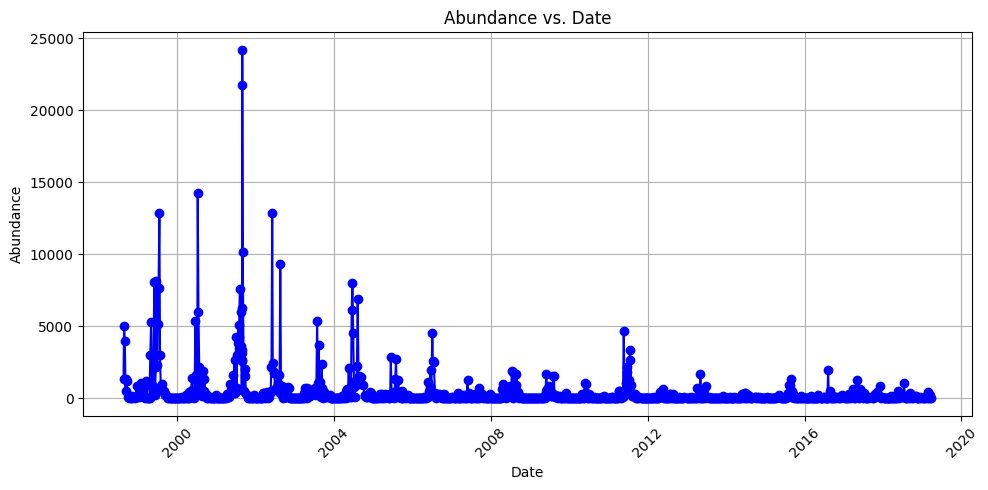

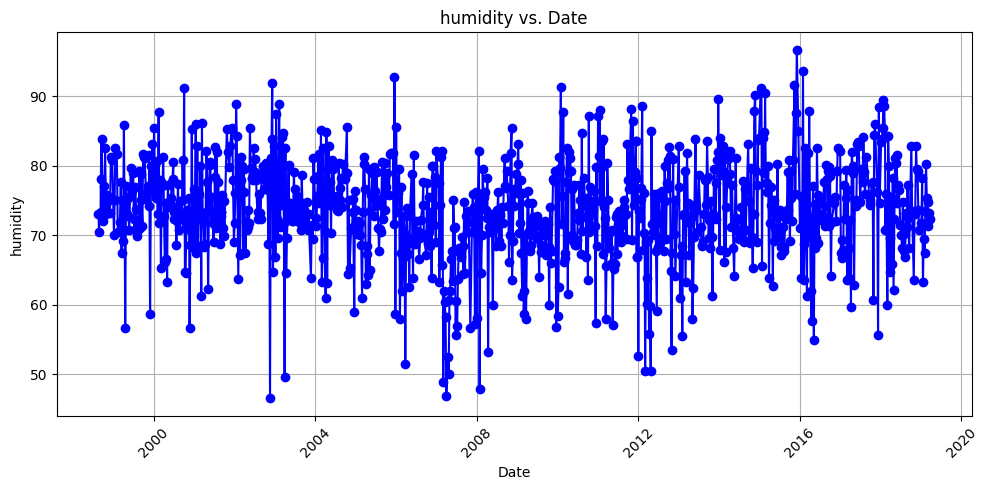

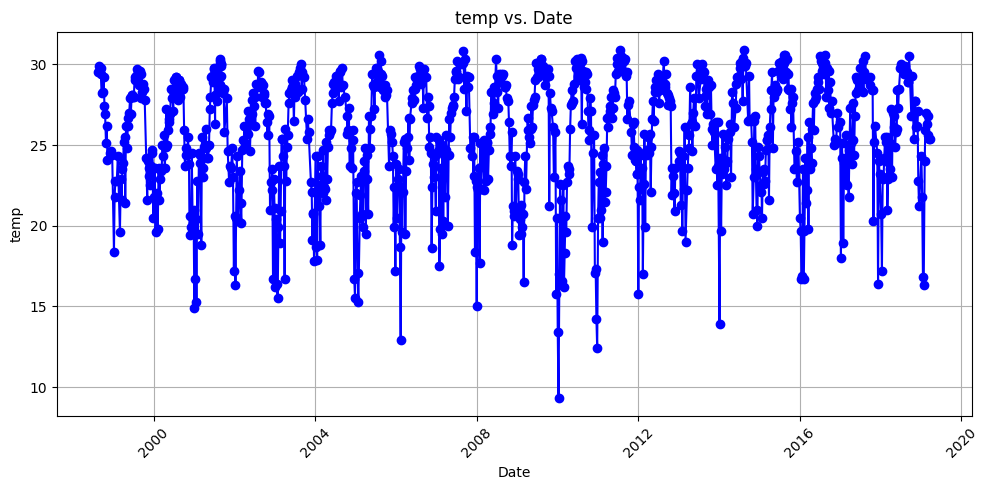

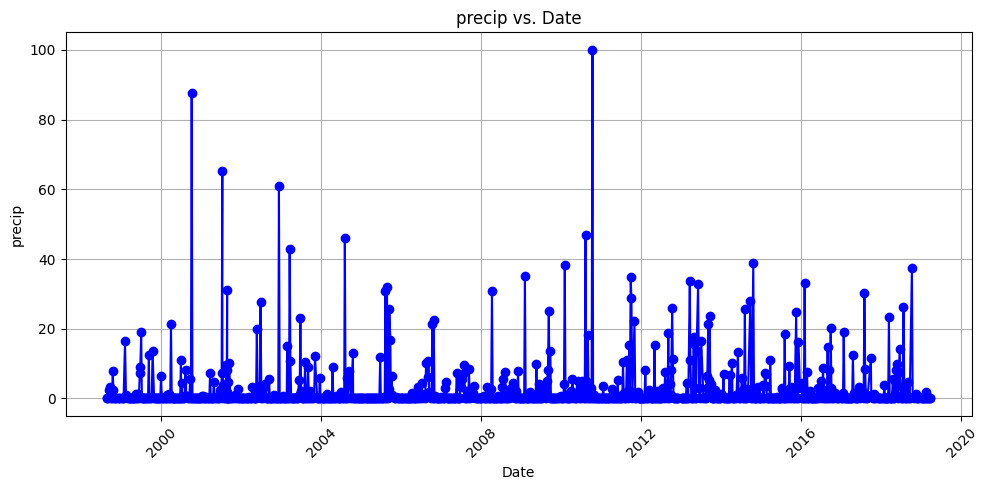

In [75]:
plot_total_vs_date(df)

# Analysis the data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Correlation Matrix:
           abundance  humidity      temp    precip
abundance   1.000000  0.014410  0.236537 -0.015222
humidity    0.014410  1.000000  0.135482  0.284626
temp        0.236537  0.135482  1.000000  0.080469
precip     -0.015222  0.284626  0.080469  1.000000


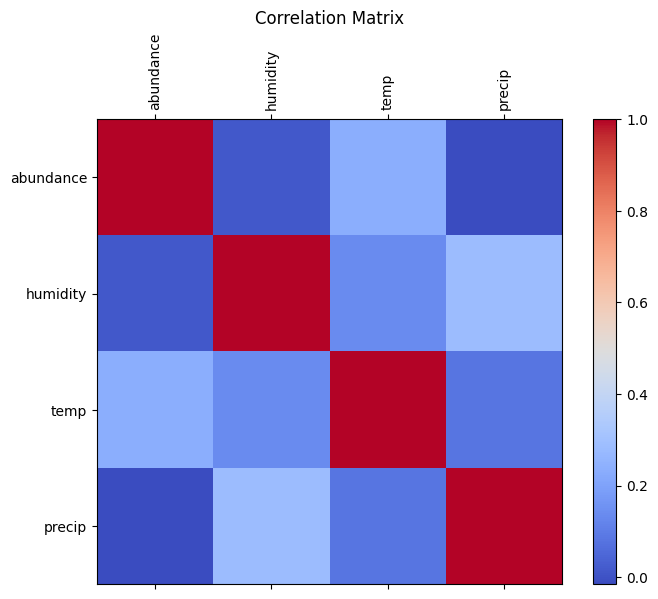

In [15]:
correlation_matrix = df[['abundance', 'humidity', 'temp', 'precip']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

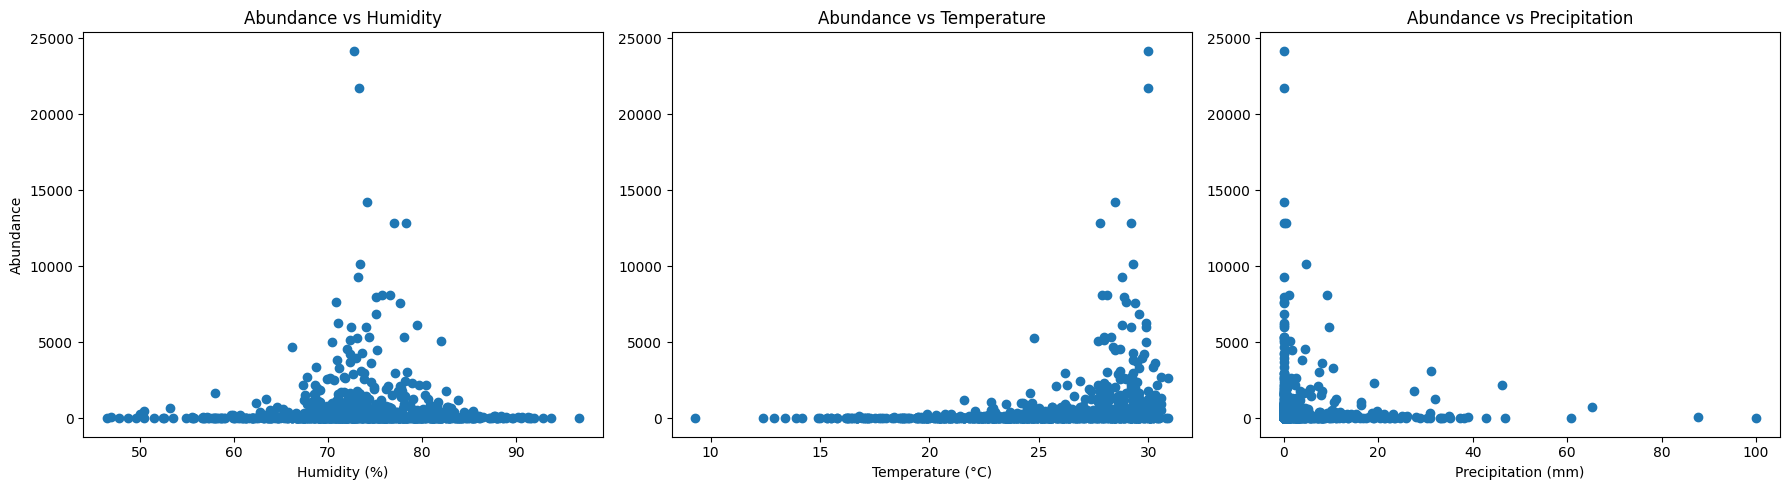

In [16]:

# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(df['humidity'], df['abundance'])
axes[0].set_title('Abundance vs Humidity')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Abundance')

axes[1].scatter(df['temp'], df['abundance'])
axes[1].set_title('Abundance vs Temperature')
axes[1].set_xlabel('Temperature (°C)')

axes[2].scatter(df['precip'], df['abundance'])
axes[2].set_title('Abundance vs Precipitation')
axes[2].set_xlabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

# Import the data

In [18]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
X = df[['humidity', 'temp', 'precip']]
y = df['abundance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 拟合随机森林模型
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                  max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 计算测试集的残差
residuals_test = y_test - y_pred

# 输出残差
print("Test residuals:", residuals_test)

Test residuals: 453    -100.218453
792      53.566922
209    -191.737982
309     -75.761387
739   -1459.510584
          ...     
78      237.515738
29     2814.622245
277      28.867334
261     -26.510370
423     -77.274584
Name: abundance, Length: 200, dtype: float64


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 计算 MSE 和 RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 计算 MAE
mae = mean_absolute_error(y_test, y_pred)

# 计算 R²
r2 = r2_score(y_test, y_pred)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("R² 或决定系数:", r2)

# 特征重要性
feature_importances = model.feature_importances_
features = X.columns
feature_importance_dict = dict(zip(features, feature_importances))
print("特征重要性:", feature_importance_dict)


均方误差 (MSE): 1959953.3066142816
均方根误差 (RMSE): 1399.9833236914938
平均绝对误差 (MAE): 655.2939014124773
R² 或决定系数: -0.47652008503406007
特征重要性: {'humidity': 0.3261122514463485, 'temp': 0.5648494307369224, 'precip': 0.10903831781672917}


In [48]:
residuals_test

453    -100.218453
792      53.566922
209    -191.737982
309     -75.761387
739   -1459.510584
          ...     
78      237.515738
29     2814.622245
277      28.867334
261     -26.510370
423     -77.274584
Name: abundance, Length: 200, dtype: float64

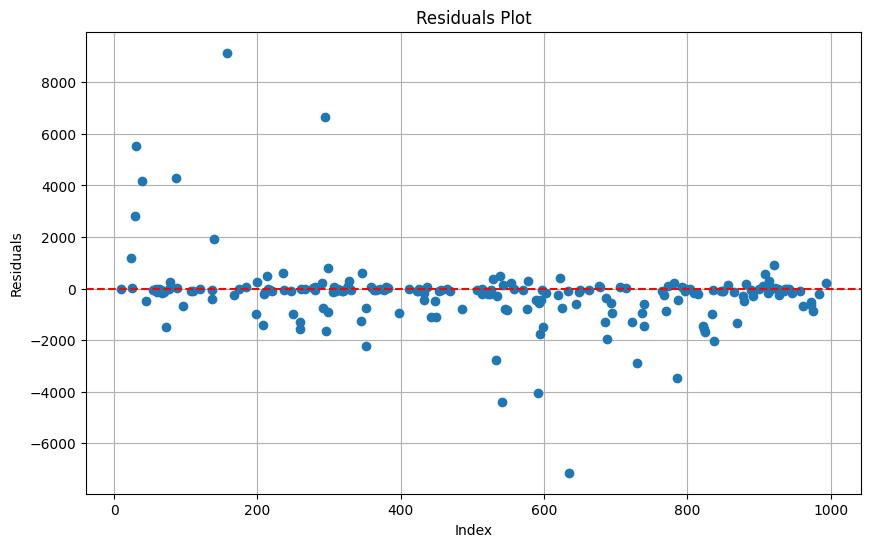

In [60]:
import matplotlib.pyplot as plt

# 假设 residuals_test 是一个 Pandas Series 或 Numpy 数组，包含模型的预测残差
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
plt.plot(residuals_test, marker='o', linestyle='')  # 使用圆圈标记每个点，不连接线条
plt.title('Residuals Plot')  # 设置图形标题
plt.xlabel('Index')  # 设置x轴标签
plt.ylabel('Residuals')  # 设置y轴标签
plt.axhline(y=0, color='r', linestyle='--')  # 画一条红色虚线在y=0
plt.grid(True)  # 显示网格
plt.show()


In [49]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
adf_result = adfuller(residuals_test)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -7.622753680341694
p-value: 2.1071622180640456e-11


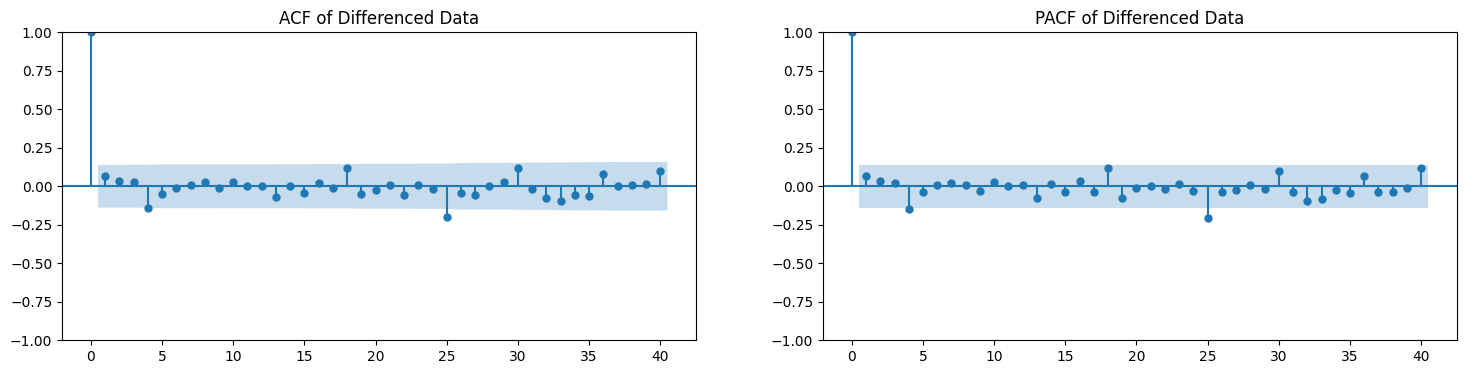

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_acf(residuals_test, lags=40, ax=ax[0])
ax[0].set_title('ACF of Differenced Data')
plot_pacf(residuals_test, lags=40, ax=ax[1], method='ywm')
ax[1].set_title('PACF of Differenced Data')
plt.show()

In [51]:
split_point = int(len(df) * 0.8)
train, test = residuals_test.iloc[:split_point], df.iloc[split_point:]

In [52]:
train

453    -100.218453
792      53.566922
209    -191.737982
309     -75.761387
739   -1459.510584
          ...     
78      237.515738
29     2814.622245
277      28.867334
261     -26.510370
423     -77.274584
Name: abundance, Length: 200, dtype: float64

In [53]:
from pmdarima import auto_arima
model_auto = auto_arima(train, start_p=0, start_q=0, max_p=25, max_q=25,
                   test='adf', seasonal=False, trace=True, error_action='ignore',
                   suppress_warnings=True, stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3467.262, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3467.685, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3467.867, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3469.325, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3464.745, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3465.823, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3465.925, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3467.797, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.135 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                        SARIMAX   Log Likelihood               -1730.373
Date:                Tue, 06 Aug 2024   AIC                           3464.745
Time:                        08:46:4

In [54]:
model_auto.resid

<bound method ARIMA.resid of ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)>

In [55]:
arima_model = ARIMA(residuals_test, order=(25, 0, 25))  # Note 'd' parameter is now 1
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Li

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              abundance   No. Observations:                  200
Model:               ARIMA(25, 0, 25)   Log Likelihood               -1710.538
Date:                Tue, 06 Aug 2024   AIC                           3525.076
Time:                        08:47:01   BIC                           3696.589
Sample:                             0   HQIC                          3594.485
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -209.1967     36.418     -5.744      0.000    -280.574    -137.819
ar.L1          0.0597      0.659      0.091      0.928      -1.233       1.352
ar.L2          0.2364      0.670      0.353      0.724      -1.077       1.549
ar.L3          0.0636      0.599      0.106      0.916      -1.111       1.238
ar.L4          0.0167      0.615      0.027      0.978      -1.189       1.222
ar.L5         -0.3678      0.523     -0.703      0.482      -1.394       0.658
ar.L6          0.2480      0.265      0.935      0.350      -0.272       0.768
ar.L7          0.3300      0.156      2.117      0.034       0.025       0.635
ar.L8          0.2111      0.215      0.983      0.326      -0.210       0.632
ar.L9         -0.2736      0.152     -1.803      0.071      -0.571       0.024
ar.L10         0.1169      0.270      0.432      0.666      -0.413       0.647
ar.L11        -0.1186      0.325     -0.365      0.715      -0.756       0.519
ar.L12        -0.0096      0.421     -0.023      0.982      -0.834       0.815
ar.L13        -0.0091      0.408     -0.022      0.982      -0.809       0.791
ar.L14      -6.91e-05      0.411     -0.000      1.000      -0.806       0.806
ar.L15        -0.2410      0.361     -0.668      0.504      -0.948       0.467
ar.L16         0.0637      0.468      0.136      0.892      -0.854       0.981
ar.L17         0.1728      0.454      0.380      0.704      -0.718       1.063
ar.L18         0.3279      0.339      0.966      0.334      -0.337       0.993
ar.L19         0.3116      0.514      0.606      0.545      -0.696       1.320
ar.L20        -0.4870      0.328     -1.484      0.138      -1.130       0.156
ar.L21         0.2005      0.262      0.765      0.444      -0.313       0.714
ar.L22         0.2607      0.326      0.800      0.424      -0.378       0.900
ar.L23         0.2451      0.275      0.890      0.373      -0.295       0.785
ar.L24        -0.2518      0.367     -0.686      0.493      -0.971       0.467
ar.L25        -0.5932      0.464     -1.279      0.201      -1.502       0.316
ma.L1         -0.0828      0.888     -0.093      0.926      -1.822       1.657
ma.L2         -0.2616      1.250     -0.209      0.834      -2.712       2.189
ma.L3         -0.0296      0.790     -0.037      0.970      -1.579       1.520
ma.L4         -0.1523      1.045     -0.146      0.884      -2.200       1.896
ma.L5          0.3764      0.932      0.404      0.686      -1.450       2.203
ma.L6         -0.2812      0.609     -0.462      0.644      -1.475       0.913
ma.L7         -0.3424      0.768     -0.446      0.656      -1.847       1.162
ma.L8         -0.2245      1.108     -0.203      0.839      -2.396       1.947
ma.L9          0.2352      1.868      0.126      0.900      -3.425       3.896
ma.L10        -0.1192      0.841     -0.142      0.887      -1.768       1.530
ma.L11         0.1352      1.150      0.118      0.906      -2.119       2.389
ma.L12         0.0745      0.622      0.120      0.905      -1.145       1.294
ma

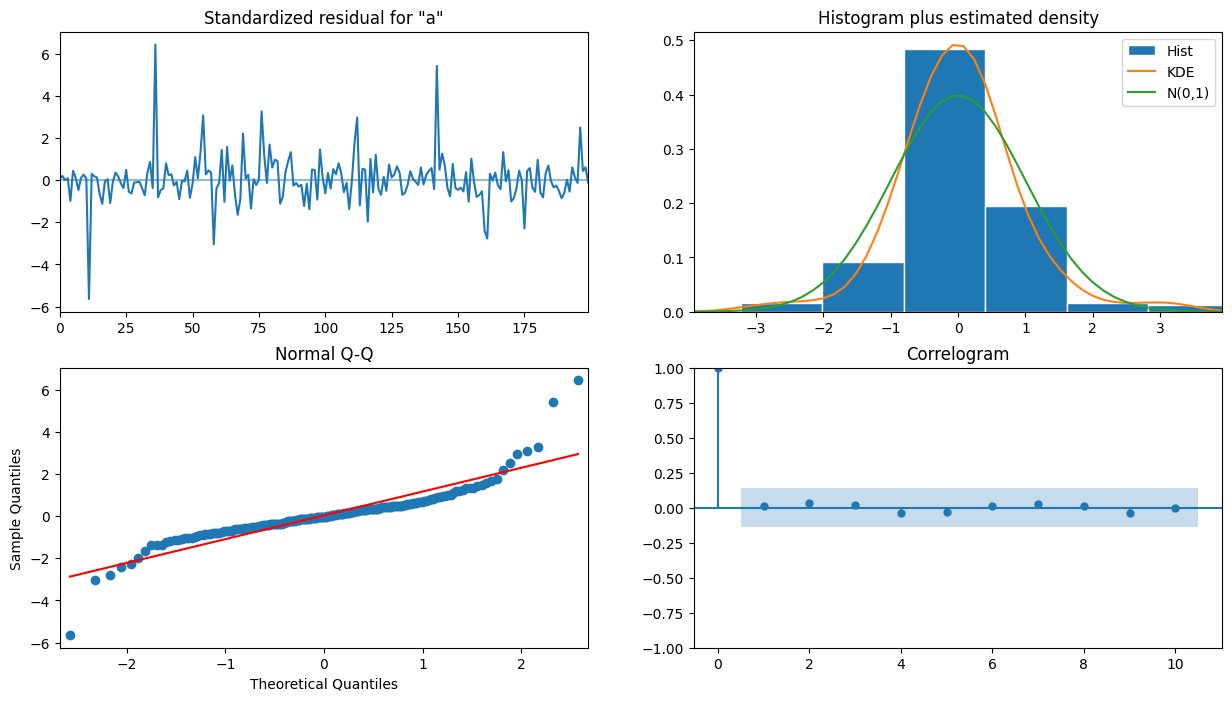

In [56]:
arima_model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

In [57]:
predictions = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
print(predictions)

200    1021.877104
201      92.519256
202    -329.623753
203    -878.055607
204    -325.458426
          ...     
395    -521.781492
396    -549.407196
397    -505.447434
398     -68.211652
399     237.005241
Name: predicted_mean, Length: 200, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [41]:
test_values = test['abundance'].values  # Replace 'abundance' with the actual target column name

# Convert predictions to a numpy array if not already (depending on output of ARIMA)
predictions_array = np.array(predictions)

# Calculate the error metrics
mse = mean_squared_error(test_values, predictions_array)
mae = mean_absolute_error(test_values, predictions_array)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  377644.5478164432
Mean Absolute Error:  447.84300211892486
Root Mean Squared Error:  614.5279064586434


In [58]:
final_prediction = y_pred[-200:] + predictions

In [59]:
# 计算 MSE 和 RMSE
mse = mean_squared_error(y_test, final_prediction)
rmse = np.sqrt(mse)

# 计算 MAE
mae = mean_absolute_error(y_test, final_prediction)

# 计算 R²
r2 = r2_score(y_test, final_prediction)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("R² 或决定系数:", r2)

均方误差 (MSE): 1933343.6723945963
均方根误差 (RMSE): 1390.447292202979
平均绝对误差 (MAE): 820.45115574804
R² 或决定系数: -0.45647386288775516
